<a href="https://colab.research.google.com/github/AltamarMx/ai_fluidmechanics/blob/main/notebooks/003_my_third_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

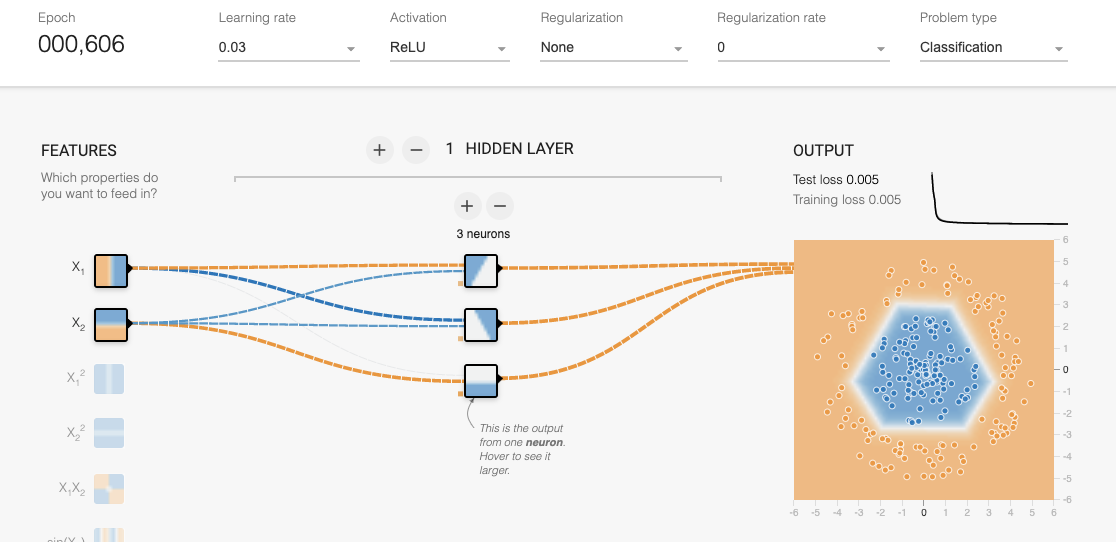

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import matplotlib.tri as mtri


import numpy as np

(-1.2836531829361608,
 1.3042860652115993,
 -1.2411298762398635,
 1.1918214562843872)

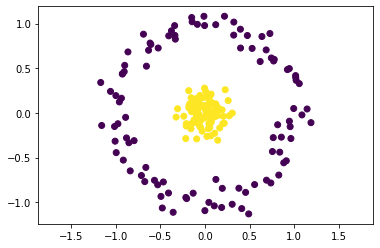

In [2]:
x, z = make_circles(n_samples=200,noise=0.1, factor=0.1)
plt.scatter(x[:,0],x[:,1],c=z)
plt.axis('equal')

In [12]:
x_train = x
y_train = z
model = keras.Sequential()

model.add(keras.Input(shape=2))
model.add(layers.Dense(4,activation='tanh',use_bias=True))
model.add(layers.Dense(1,activation='sigmoid',use_bias=True))

In [13]:
model.compile(loss='MSE',optimizer=keras.optimizers.Adam(learning_rate=0.03))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [14]:
problem = model.fit(x_train,y_train,epochs=200,verbose=False)

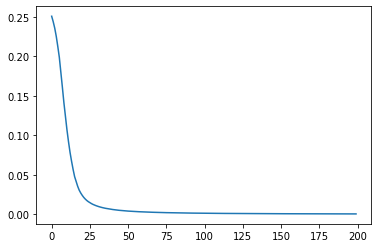

In [15]:
plt.plot(problem.history['loss'])


In [16]:
x[0],z[0]

(array([ 0.48967716, -1.13054118]), 0)

In [17]:
model.predict([[-0.17762845, -0.02487596]])

array([[0.9888109]], dtype=float32)

In [18]:
xx = np.linspace(-2,2,100)
yy = np.linspace(-2,2,100)
X = np.array([[i,j] for i in xx for j in yy])


In [19]:
Z = model.predict(X)
Z = Z.flatten()


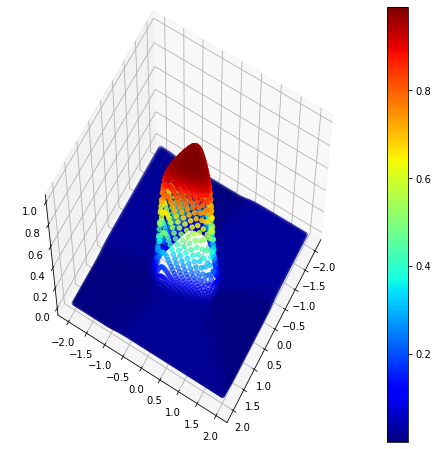

In [20]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

sc = ax.scatter(X[:,0], X[:,1], Z,c=Z,cmap="jet")
fig.colorbar(sc)
ax.view_init(90,0)
ax.view_init(60,30)

# plt.show()